<a href="https://colab.research.google.com/github/russmendez/DS_notebooks/blob/master/Time_Series_for_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Time Series

### Seasonality

In [2]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
learning_progress = pd.DataFrame()

# Add a range of 100 dates, starting January 1, 2017.
learning_progress['date'] = pd.date_range(start='2017-01-01', periods=100)

# Add linearly increasing `knowledge` and oscillating `confidence`.
learning_progress['knowledge'] = np.arange(0, 100)
learning_progress['confidence'] = 180+(10 * np.cos(np.arange(0, 100) * np.pi / 7) + np.arange(0, 100))

Text(0.5, 1.0, 'Scatter Plot')

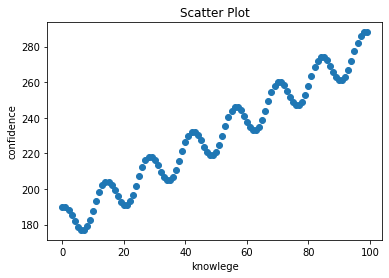

In [6]:
plt.scatter(learning_progress.knowledge, learning_progress.confidence)
plt.xlabel('knowlege')
plt.ylabel('confidence')
plt.title('Scatter Plot')

In [ ]:
learning_progress

,date,knowledge,confidence
0,2017-01-01,0,170.000000
1,2017-01-02,1,169.990311
2,2017-01-03,2,171.765102
3,2017-01-04,3,174.774791
4,2017-01-05,4,178.225209
...,...,...,...
95,2017-04-06,95,82.774791
96,2017-04-07,96,77.765102
97,2017-04-08,97,73.990311
98,2017-04-09,98,72.000000


No handles with labels found to put in legend.


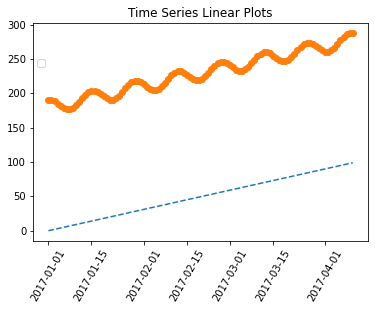

In [5]:
plt.plot(learning_progress.date, learning_progress.knowledge, '--')
plt.plot(learning_progress.date, learning_progress.confidence, 'o-')
plt.xticks(rotation=60)
plt.legend(loc = (.01,.8))
plt.title('Time Series Linear Plots')
plt.show()

### Linear Trends

In [7]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

# Note that for scikit-learn, you must convert your data to numeric.
X = pd.DataFrame(pd.to_numeric(learning_progress['date']))
Y = learning_progress['confidence']
lm.fit(X, Y)
lm.score(X, Y)

0.9431566970528265

In [8]:
lm.coef_[0]

1.1635327364626975e-14

In [9]:
# Convert coefficient from nanoseconds to days.
lm.coef_[0] * 1000000000 * 24 * 60 * 60

# scikit-learn requires all values to be numeric. pd.to_numeric can change datetime objects, but it converts them into nanoseconds
# since the 'epoch time', Jan 1, 1970. This will make the numbers more meaningful.

1.0052922843037708

In [ ]:
# For the class: What does this coefficient mean?

###Indicators and Oscillators

Trends represent an average over the entire period of time. In time series you are not simply looking for trends but patterns of seasonality. Two common tools used for this are indicators and oscillators.

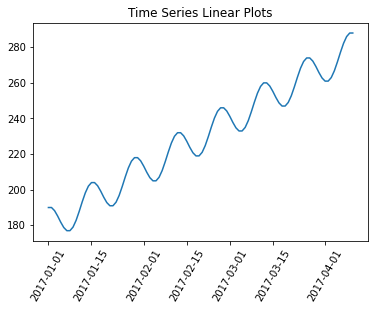

In [10]:
plt.plot(learning_progress.date, learning_progress.confidence)
plt.xticks(rotation=60)
plt.title('Time Series Linear Plots')
plt.show()

#For the class: What sort of pattern does this follow?

In [ ]:
learning_progress

,date,knowledge,confidence
0,2017-01-01,0,170.000000
1,2017-01-02,1,169.990311
2,2017-01-03,2,171.765102
3,2017-01-04,3,174.774791
4,2017-01-05,4,178.225209
...,...,...,...
95,2017-04-06,95,82.774791
96,2017-04-07,96,77.765102
97,2017-04-08,97,73.990311
98,2017-04-09,98,72.000000


In [11]:
learning_progress['day_of_week'] = learning_progress.date.apply(
    lambda x: str(dt.datetime.weekday(x)))

X = pd.get_dummies(learning_progress.day_of_week)
X['date'] = pd.to_numeric(learning_progress.date) / (1000000000 * 24 * 60 * 60)
Y = learning_progress['confidence']
lm.fit(X, Y)
lm.score(X, Y)

0.9432516072175562

In [12]:
print(X.columns)
print(lm.coef_)

# Class: When is the confidence of the model highest?

Index(['0', '1', '2', '3', '4', '5', '6', 'date'], dtype='object')
[ 0.41694745 -0.17042941 -0.17573703 -0.18104465 -0.18635228 -0.1916599
  0.48827582  1.00530762]


In [ ]:
X

,0,1,2,3,4,5,6,date
0,0,0,0,0,0,0,1,17167.0
1,1,0,0,0,0,0,0,17168.0
2,0,1,0,0,0,0,0,17169.0
3,0,0,1,0,0,0,0,17170.0
4,0,0,0,1,0,0,0,17171.0
...,...,...,...,...,...,...,...,...
95,0,0,0,1,0,0,0,17262.0
96,0,0,0,0,1,0,0,17263.0
97,0,0,0,0,0,1,0,17264.0
98,0,0,0,0,0,0,1,17265.0


In [13]:
X = pd.DataFrame()
X['date'] = pd.to_numeric(learning_progress.date) / (1000000000 * 24 * 60 * 60)

# Note that you're subtracting 17,167 from `date`.
# This is to normalize it so that it starts at zero.
# This aligns the peak of the curve with the start of the cosine function.

X['cos_date'] = np.cos((X.date - 17167) * np.pi / 3.5)
Y = learning_progress['confidence']
lm.fit(X, Y)
lm.score(X, Y)

0.9432077395162711

In [14]:
lm.coef_

array([1.00518266, 0.30084893])

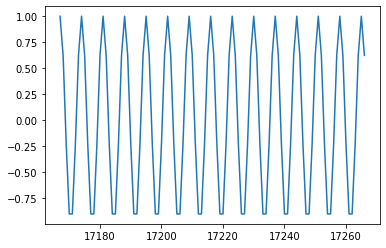

In [15]:
plt.plot(X.date, X.cos_date)

#ARIMA modeling

Previously, we looked at indicators and oscillators to explain seasonality. There is another branch of time series modeling and that branch is focused on random movement and consistency rather than seasonality. 

###Stationary 
Temporal data is said to be stationary when the trends in the data stay consistent outside of absolute time or seasonality. Mathmatically, this means that the mean and variance are constant and the covariance is independent of time. 

A sine curve, or any graphable equastion, is an example of stationary data becaue the output will always be determined by the input without any varience. A prime example of non-stationary data are stock prices. A growing or diminishing interest in any given stock, say GME, can cause a mass shift in the variance thereby increasing or decreasing the rate of change. 

In instances of non-stationary data we may still want to look for deterministic patterns. For example, we may want to see if previou values can determine the next value.

How is this done? By the use of differencing and ARIMA, autoregressive integrated moving average.

### Differencing

Conveniently, there is an easy way to make our data stationary and that is differencing. All you have to do in differencing is subtract a term from the term that follows it. 

###Autoregressive Models
Simply put, autogression places the outputs from yesterday into a linear equasion to predict the output for today. 

*X<sub>time</sub> = &alpha; + &beta;X<sub>time-1</sub> + &epsilon;*

Where &alpha; is a constant of adjustment, &beta; is the weight or how much the previous value affects the next value and &epsilon; is the noise term.


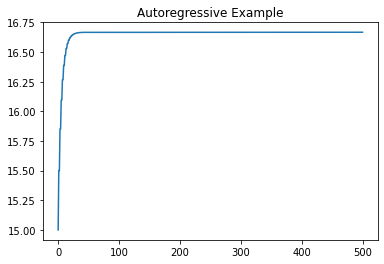

In [16]:
alpha = 5
beta = .7


x_ar = [15]
for i in range(500):
    y = alpha + beta*x_ar[i-1] 
    x_ar.append(float(y))

plt.plot(x_ar)
plt.title('Autoregressive Example')
plt.show()

This is a graph of the random movement generated by the autoregressive model.

The order of autoregressive models is denoted *AR(n)*, where *n* represents the lag or how far back you look you look to predict the current value. It is important to note that in autogressive models you do no skip lag terms. So *AR(n)* means the lag terms are the terms *1* through *n*. This example does not model the full complexity of lag terms but will give you the general sense of how they work.

Try playing with &alpha; and &beta; to see how they affects the results.

### Moving Average

In autoregressive models we looked at the previous term plus some noise to determine the value of the current term. That noise was in fact the error &epsilon;. To understand moving averages we shift our attention from the previous term to the previous error.

X<sub>time</sub> = &alpha; + &beta;&epsilon;<sub>time-1</sub> + &epsilon;

Note that we no longer consider *X* in the right hand of the equasion. Instead we are focused on the error inherited from the from the previous prediction.

Again, we denote the order of the moving average *MA(n)*.

Play with the values. How does changing &alpha; or &beta; affect things?

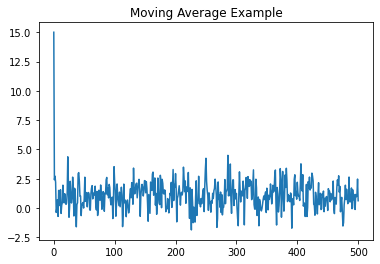

In [17]:
alpha = 5
beta = .7

x_ma = [15]
e_t = 0
for i in range(500):
    e = np.random.randn(1)
    y = 1 + .3*e_t + e
    x_ma.append(float(y))
    e_t=e

plt.plot(x_ma)
plt.title('Moving Average Example')
plt.show()

###Finding the best order

Now we have these two models that look at the at the previous term, *AR(n)*, and previous error, *MA(n)* to predict the current term. They both have an optimal order to use for prediction. However, the order is not always going to be the same for both models. Therefore, we must find the optimal orders and to do so we will use partial autocorrelation. 

Partial autocorrelation compares a time series with a lagged version itself. The x-axis in the graph below how many steps back the lagged version is to itself. For this reason, the partial autocorrelation at 0 will always be 1, because the time series perfectly correlations to itself. 

Once we have out terms we will denote the model *ARMA(p,q) where *p* is the order of the autoregressive component *AR(p)* and *q* is the order of the moving average component *MA(q)*.

Text(0.5, 1.0, 'AR(1) PACF')

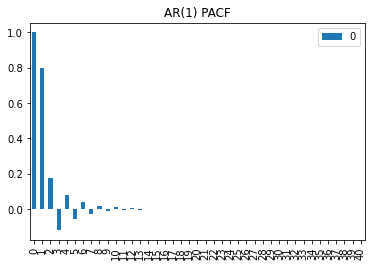

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(pacf(x_ar))
x_acf.plot(kind='bar')
plt.title("AR(1) PACF")

Text(0.5, 1.0, 'MA(1) PACF')

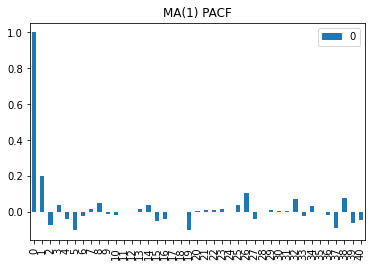

In [ ]:
x_acf = pd.DataFrame(pacf(x_ma))
x_acf.plot(kind='bar')
plt.title('MA(1) PACF')

What do these mean? In this case what we are looking for is a strong autocorrelation. We can ignore the 0 order because this will always be perfect. So then we are looking for the next number that explains the most variance. 

In this example, we would pick *ARMA(2,1)*

### Integration

What if the *p* and *q* values are high? This is a sign that you may need to apply more differencing. In our final notation *ARIMA(p,d,q)*, *d* represents the level of differnencing (*d=1* will be a simple difference, *d=2* will be the difference of differences and so on). This can be done manually, as done above, or it can be entered into the ARIMA model which we will discuss later. 



#FRED

In [ ]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sp_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/SP500_raw.csv')

# Convert exchange rate to a number, with coercion to throw `NA` values if conversion not possible
sp_data['price'] = pd.to_numeric(sp_data.SP500, errors='coerce')

# Remove `NA` values
sp_data.dropna(inplace=True)

In [ ]:
sp_data.head()

,DATE,SP500,price
0,2008-01-02,1447.16,1447.16
1,2008-01-03,1447.16,1447.16
2,2008-01-04,1411.63,1411.63
3,2008-01-07,1416.18,1416.18
4,2008-01-08,1390.19,1390.19


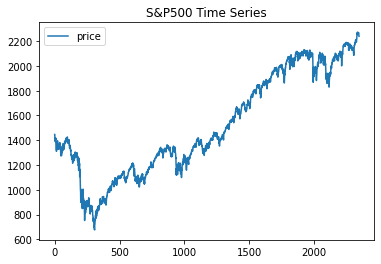

In [ ]:
sp_data.plot()
plt.title('S&P500 Time Series')
plt.show()

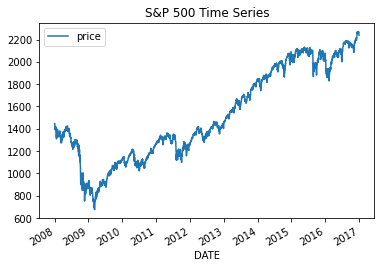

In [ ]:
# Turning the index into the date will make plotting easier 
sp_data.index = pd.to_datetime(sp_data.DATE)
sp_data.plot()
plt.title('S&P 500 Time Series')
plt.show()

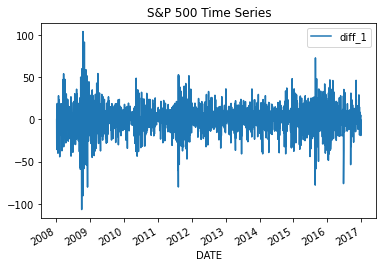

In [ ]:
#Differencing 
sp_data['diff_1'] = sp_data.price - sp_data.price.shift()
sp_data.plot(y='diff_1')
plt.title('S&P 500 Time Series')
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'S&P PACF')

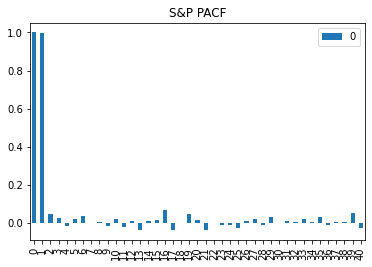

In [ ]:
#PACF for inital time series
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(sp_data.price))
x_acf.plot(kind='bar')
plt.title("S&P PACF")

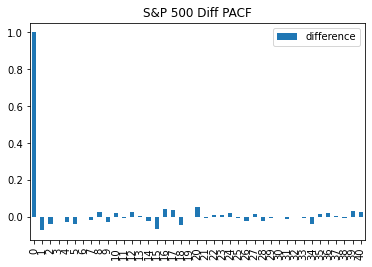

In [ ]:
#PACF for differenced time series
x_acf = pd.DataFrame(pacf(sp_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("S&P 500 Diff PACF")
plt.legend(['difference'])

#ARIMA
As a reminder, the ARIMA model takes the arguments in the *(p,d,q)* order.

Recall that AR is the past values, I is the differencing, and MA is adjusting to past errors.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2266
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9592.974
Method:                       css-mle   S.D. of innovations             16.685
Date:                Tue, 18 May 2021   AIC                          19193.947
Time:                        19:50:02   BIC                          19216.850
Sample:                             1   HQIC                         19202.304
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3529      0.289      1.222      0.222      -0.213       0.919
ar.L1.D.price     0.5832      0.155      3.765      0.000       0.280       0.887
ma.L1.D.price    -0.6565      0.144     

Text(0.5, 1.0, 'Histogram of Residuals')

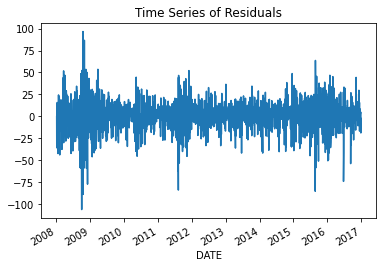

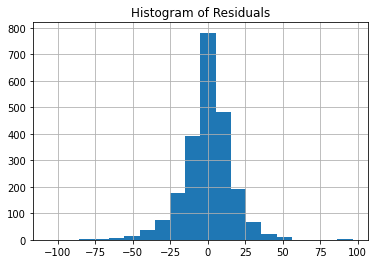

In [ ]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

### Residuals 
Residuals are the difference in your prediction and observed value. They are how accuracte your models are. You want your residuals to be random and normally distributed.

What can we learn from these plots?

From the first, we see there is not a clear trend to the residuals. There are places of higher volitlity than others. 

From the second, the data does appear to be normally distributed but is has a tail on the lower end.

What external factors could help to explain these results?

#Intepreting ARIMA

Lets take ARIMA(1,0,1) as an example. 

We can see the constant has a starting point of about 1700.

The AR is .9994 which tells us that each day is approximately equal to the last day.

The MA is -.0787 which means that by incorporating the moving average into the model will reduce the error of the model by 8% per day.



In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 2267
Model:                     ARMA(1, 1)   Log Likelihood               -9603.247
Method:                       css-mle   S.D. of innovations             16.705
Date:                Tue, 18 May 2021   AIC                          19214.494
Time:                        19:51:32   BIC                          19237.398
Sample:                             0   HQIC                         19222.851
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1713.2272    346.652      4.942      0.000    1033.802    2392.653
ar.L1.price     0.9994      0.001   1779.728      0.000       0.998       1.000
ma.L1.price    -0.0787      0.022     -3.614    

Text(0.5, 1.0, 'Histogram of Residuals')

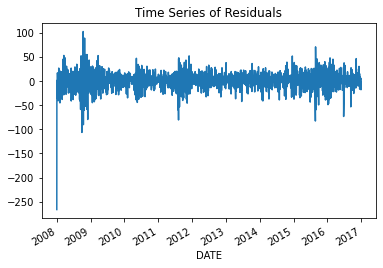

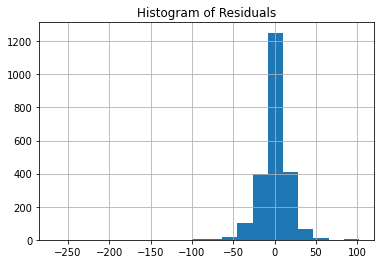

In [ ]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

#Akaike Information Criterion (AIC)

The final question we will address is how do we evaluate which of these models is the best. We will do that with the AIC. The AIC measures the information contained by the model. To find the best model, select the one with the lowest score. If you want to know just how much better one model is to another you can use the following equasion:

*exp((AIC<sub>min</sub> - AIC<sub>x</sub>)/2)*

This gives the probabiliy of having lost less information than the other model.

Take for example ARIMA(1,1,1) and ARIMA(1,0,0) which have a score of 19,193 and 19,225. If we plug these into the equasion we can see that there is a 1.127e-7 probability that we lost less information in the ARIMA(1,0,0) model. That is a big difference and suggest ARIMA(1,1,1) is a much better model.